In [16]:
import os
import glob
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

import pysptools.spectro as spectro

import scipy.signal as ss

# Figures and plot settings
plt.rcParams['figure.figsize'] = [50, 30]
plt.rcParams['figure.dpi'] = 600

%matplotlib inline

In [17]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\HSI-ROI-Samples")
files = list(files_path.glob('*.txt'))

In [18]:
# Get sample name/label
samples = []

for i, file in enumerate(files):
    samples.append(files[i].stem[7:])
    
#print(samples[0])

In [19]:
# Create dataframe of Mean spectra per sample (Region of Interest)
roi = []
columns = ['Wavelength','Min','Mean-Std','Mean','Mean+Std','Max']

for i, file in enumerate(files):
    df = pd.read_csv(files[i], header=7, sep=' ', names=columns, 
                     index_col=0, skipinitialspace=True, dtype='float64')
    roi.append(df['Mean'])

samples_df = pd.concat(roi, axis=1, ignore_index=True)
samples_df.columns = samples

# Discard noisy bands > 400 nm and < 800 nm
samples_df = samples_df.loc['400':'801',:]
# Acquire the bands (x axis) after cropping the dataframe.
bands = samples_df.index.values

In [56]:
sample_dict = {}
c_start = '543'
c_stop = '583'

for col in samples_df:
    sav_gol_filter = ss.savgol_filter(samples_df.loc[c_start:c_stop,:][col].values, 3, 1) # Select bands and column values, perform SG filter.
    pre_continuum = list(sav_gol_filter) # Convert to list
    wvl = list(samples_df.loc[c_start:c_stop,:].index.values) # Select bands
    conv_h_q = spectro.FeaturesConvexHullQuotient(pre_continuum, wvl, baseline=0.999) # Continuum removal object
    sample_dict[col] = conv_h_q # Store in dictionary

CE01
Features:  1
Absorbtion wvl:  566.03
Absorbtion depth:  0.9387109792462296
Area : 1.38894479282628
CE01 1.4796298578946856


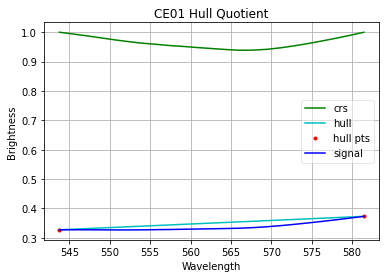

CE01B
Features:  1
Absorbtion wvl:  566.03
Absorbtion depth:  0.9667217946064689
Area : 0.6953891131603842
CE01B 0.7193270256656019


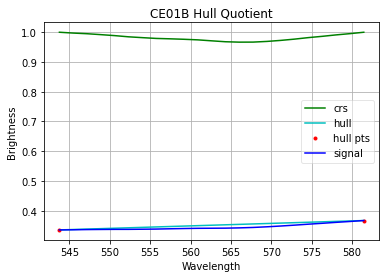

CE02
Features:  1
Absorbtion wvl:  566.03
Absorbtion depth:  0.9056592558565502
Area : 2.1743654640091026
CE02 2.4008648395611454


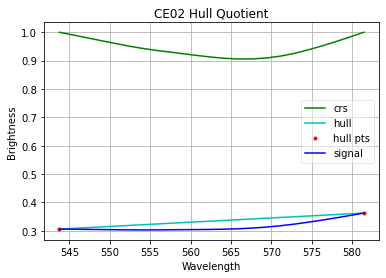

CE03
Features:  1
Absorbtion wvl:  567.74
Absorbtion depth:  0.937798217269735
Area : 1.3281926411473264
CE03 1.41628829815242


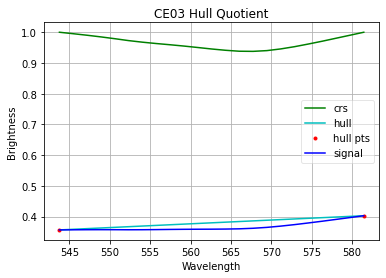

CE03B
Features:  1
Absorbtion wvl:  567.74
Absorbtion depth:  0.9970688672316074
Area : 0.019699557672851274
CE03B 0.01975746943894428


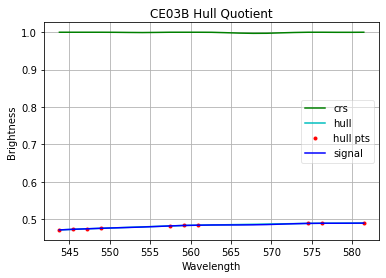

CE04
Features:  1
Absorbtion wvl:  567.74
Absorbtion depth:  0.9275789972846995
Area : 1.5983270839877368
CE04 1.7231169406234046


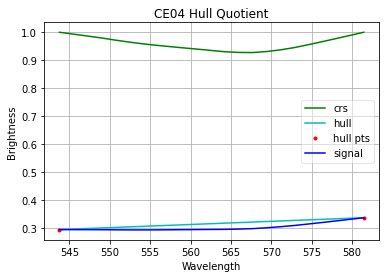

CE05
Features:  1
Absorbtion wvl:  567.74
Absorbtion depth:  0.8532382563093887
Area : 3.367208822583153
CE05 3.9463875391004333


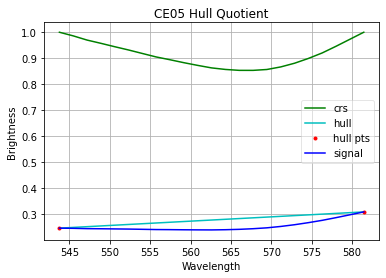

GN02
Features:  1
Absorbtion wvl:  567.74
Absorbtion depth:  0.8541451142620741
Area : 3.34610632872207
GN02 3.9174916215646665


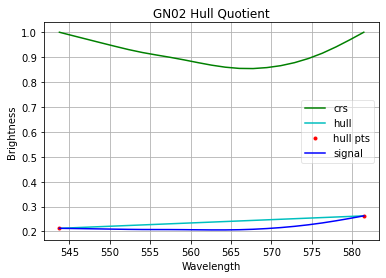

GN03
Features:  1
Absorbtion wvl:  567.74
Absorbtion depth:  0.9090335077565525
Area : 2.034228674144932
GN03 2.2377928390839


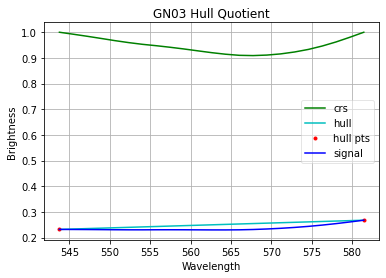

GN04
Features:  1
Absorbtion wvl:  567.74
Absorbtion depth:  0.8398209481975527
Area : 3.724167978488618
GN04 4.434478547458874


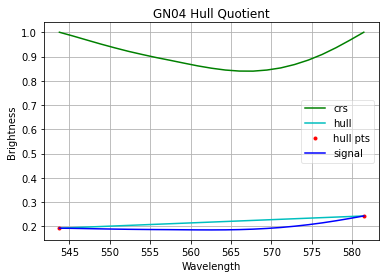

GN05
Features:  1
Absorbtion wvl:  566.03
Absorbtion depth:  0.8765331096858777
Area : 2.8016725444530928
GN05 3.196311141580408


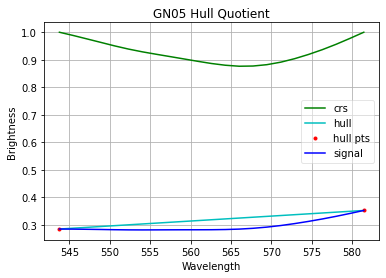

GN06
Features:  1
Absorbtion wvl:  566.03
Absorbtion depth:  0.8116396572000828
Area : 4.41595691335969
GN06 5.440785050589368


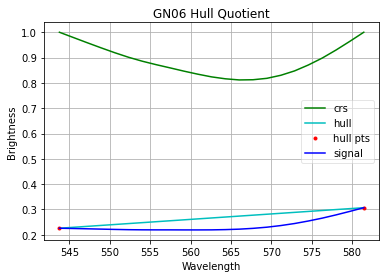

GN07
Features:  1
Absorbtion wvl:  567.74
Absorbtion depth:  0.88376926010051
Area : 2.6577940241893336
GN07 3.007339295651747


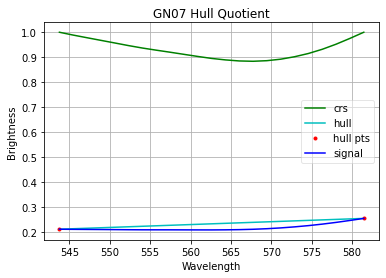

GN08
Features:  1
Absorbtion wvl:  567.74
Absorbtion depth:  0.8283139637138015
Area : 3.937548152108599
GN08 4.753690417645909


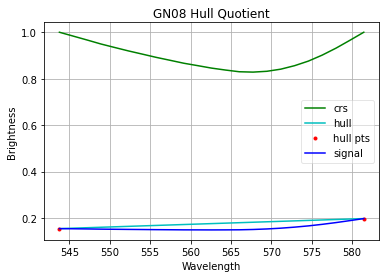

GS03
Features:  1
Absorbtion wvl:  566.03
Absorbtion depth:  0.846492950026025
Area : 3.5335732427704794
GS03 4.174368188963466


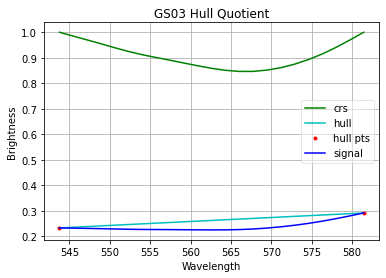

In [57]:
for key in sample_dict:
    print(key)
    print('Features: ', sample_dict[key].get_number_of_kept_features())
    print('Absorbtion wvl: ', sample_dict[key].get_absorbtion_wavelength(feat_no=1))
    print('Absorbtion depth: ', sample_dict[key].get_absorbtion_depth(feat_no=1))
    print('Area :', sample_dict[key].get_area(feat_no=1))
    auc = sample_dict[key].get_area(feat_no=1)
    mbd = sample_dict[key].get_absorbtion_depth(feat_no=1)
    anmb_480_520 = auc/mbd
    print(key, anmb_480_520)
    #print(key, sample_dict[key].print_stats(feat_no='all'))
    #print(key, sample_dict[key].get_continuum_removed_spectrum(feat_no=1))
    sample_dict[key].display_convex_hull_quotient(plot_name=key)
    plt.show()

In [25]:
t_indices

,AUC499


2.5793583586338347


In [15]:
type()

str

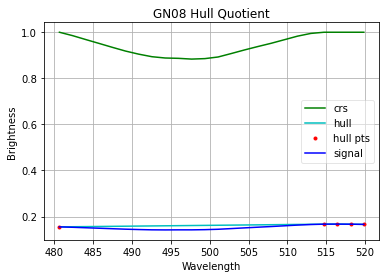

In [11]:
sample_dict[col].display_convex_hull_quotient(plot_name=col)